In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.remote.webelement import WebElement
from selenium.common.exceptions import NoSuchElementException

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score,mean_squared_error
from sklearn import linear_model, metrics, preprocessing
from sklearn.neighbors import KNeighborsRegressor


# Crawling and Selenium

In [ ]:
def scrape_links(drivers,link_hrefs):
    
    for i in range(0,38):
        driver.get(drivers+'?page='+str(i))
        driver.implicitly_wait(10)
        more_items_elements = driver.find_elements(By.CLASS_NAME, 'more-items')
        for more_items_element in more_items_elements:
            link_elements = more_items_element.find_elements(By.TAG_NAME, 'a')
            for link_element in link_elements:
                link_hrefs.append(link_element.get_attribute('href'))
    
    return link_hrefs


In [ ]:
driver = webdriver.Chrome()
link = ['https://www.mako.co.il/news-military','https://www.mako.co.il/news-law','https://www.mako.co.il/news-world',
       'https://www.mako.co.il/news-money','https://www.mako.co.il/news-sport','https://www.mako.co.il/news-entertainment',
       'https://www.mako.co.il/news-lifestyle','https://www.mako.co.il/news-business','https://www.mako.co.il/news-digital',
       'https://www.mako.co.il/news-science','https://www.mako.co.il/news-money/real_estate',
       'https://www.mako.co.il/news-columns','https://www.mako.co.il/news-israel']

link_hrefs = []

for link_element in link:
    scrape_links(link_element,link_hrefs)
    
driver.close()

print(len(link_hrefs))
link_hrefs=list(set(link_hrefs))
print(len(link_hrefs))

Author = list()
Topic = list()
Views = list()
Comments = list()
Date = list()
Hour = list()
Interest= list()
N_Interest= list()
Source= list()
Video= list()
Article= list()


In [ ]:
for i in link_hrefs:
    response = requests.get(i)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    name_elements = soup.find_all('span', {'class': 'source'})
    if name_elements:
        text = name_elements[0].text
        Source.append(text)
    else:
        Source.append(None)  
    
    date_element = soup.find('span', class_='display-date')
    if date_element:
        date_string = date_element.text.strip().split()
        date = date_string[2]
        Date.append(date)
    else:
        Date.append(None)
       
  
    author_element = soup.find('span', {'itemprop': 'author'})
    if author_element:
        content = author_element['content']
        Author.append(content)
    else:
        Author.append(None)
    
    name_elements = soup.find_all('span', {'itemprop': 'name'})
    if name_elements:
        name_element1 = name_elements[1]
        text = name_element1.text
        Topic.append(text)
    else:
        Topic.append(None)   
        
    elements = soup.select('span.display-date span')

    if elements:
        if len(elements) > 1:
            text = elements[1].get_text()
            Hour.append(text)
        else:
            Hour.append(None)
    else:
        Hour.append(None)
        
    element = soup.find('span',{'itemprop':'headline'})
    if element is not None:
        content= element.get('content')
        Article.append(content)
    else:
        Article.append(None)
    print(len(Article))

In [ ]:
driver = webdriver.Chrome()
for link in link_hrefs:
    driver.get(link)
    
    try:
        parent_element = driver.find_element(By.CSS_SELECTOR, 'li.views')
        element = parent_element.find_element(By.CSS_SELECTOR, 'span')
        views1 = element.text
        Views.append(views1)
    except NoSuchElementException:
        Views.append(None)
    
    try:
        element = driver.find_element(By.CSS_SELECTOR, 'span.mako_comments__ammount')
        comment1 = element.get_attribute('data-amount')
        Comments.append(comment1)
    except NoSuchElementException:
        Comments.append(None)
    
    
    try:
        elements = driver.find_elements(By.XPATH, '//a[@data-count]')
        if len(elements) >= 2:
            second_element = elements[1]
            n_interest = second_element.get_attribute('data-count')
            N_Interest.append(n_interest)
        else:
            N_Interest.append(None)
    except NoSuchElementException:
        N_Interest.append(None)
   
    try:
        element = driver.find_element(By.XPATH, '//a[@data-count]')
        count = element.get_attribute('data-count')
        Interest.append(Interest)
    except NoSuchElementException:
        Interest.append(None)
        
    try:
        elements = driver.find_elements(By.CSS_SELECTOR, '.video_thumb_container')
        if len(elements) > 0:
            Video.append('1') 
        else:
            Video.append('0')     
    except NoSuchElementException:
        Video.append(None)
    
        
    print(len(N_Interest))
      
driver.close()

In [ ]:
df = pd.DataFrame({'Article_Name':Article,'Author':Author,'Topic':Topic,'Date':Date,'Hour':Hour,'Views':Views,'Comments':Comments,'Interest':Interest,'N_Interest':N_Interest,'Video':Video,'Source':Source})
df.to_csv('Articles.csv',index=False)

In [194]:
df = pd.read_csv('ArticlesP.csv', encoding="utf-8")
df

,Article_Name,Author,Topic,Date,Hour,Views,Comments,Interest,N_Interest,Video,Source
0,הדרמה הגדולה בהיסטוריה: ליאו מסי ונבחרת ארגנטי...,בן גולדפריינד,ספורט,2022-12-18,16:42,40070.0,8.0,478.0,40.0,1.0,N12
1,חייל הסיור הבדואי הוכר כסובל מפוסט-טראומה לצמי...,אביבית מיסניקוב,ביטחוני,2022-09-11,12:11,12804.0,3.0,217.0,11.0,0.0,N12
2,משבר הדיור רחוק מפתרון וצפוי להחריף - והכל בחס...,עו,Business,2022-04-26,17:02,NaN,1.0,39.0,5.0,0.0,duns100
3,חשפו את פער הגילים הקיצוני שלהם - והרשת רתחה,NaN,דיגיטל,2022-04-19,09:11,36747.0,12.0,7.0,9.0,0.0,היקס
4,לכבוד החגים: ניימאר רכש אחוזה נוספת בברזיל,"יוליה פריליק-ניב, LIVING",כלכלה,2021-12-28,07:00,29094.0,14.0,209.0,128.0,0.0,LIVING
...,...,...,...,...,...,...,...,...,...,...,...
7170,מילה קוניס מאשרת: שיקרתי לגבי הגיל שלי באודישן...,שרון גולן מאירי,תרבות,2022-10-11,10:51,119928.0,36.0,712.0,225.0,0.0,mako
7171,"אימפריית הנדל""ן של משפחת וינברג מתל אביב נחשפת",רונית מורגנשטרן,כלכלה,2022-10-13,09:51,125979.0,64.0,1068.0,168.0,0.0,N12
7172,מחקר חדש מצא: 1 מתוך 10 אמריקנים מעל גיל 65 סו...,NaN,מדע וסביבה,2022-10-25,13:13,1857.0,NaN,65.0,2.0,0.0,תוכנית חיסכון
7173,נקבע מותו של הילד שנורה בידי המשטרה בערב הבחירות,ניצן שפירא,פנים,2022-11-30,14:00,5055.0,NaN,123.0,16.0,0.0,המהדורה המרכזית


# Formatting Data

In [195]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# Extract the name of the day
df['Day'] = df['Date'].apply(lambda x: x.day_name())

In [196]:
df1=df.copy()
df1=df1.dropna()
df1=df1.drop_duplicates(subset=['Article_Name'],keep='first')
df1.reset_index(inplace=True, drop=True)
df1

,Article_Name,Author,Topic,Date,Hour,Views,Comments,Interest,N_Interest,Video,Source,Day
0,הדרמה הגדולה בהיסטוריה: ליאו מסי ונבחרת ארגנטי...,בן גולדפריינד,ספורט,2022-12-18,16:42,40070.0,8.0,478.0,40.0,1.0,N12,Sunday
1,חייל הסיור הבדואי הוכר כסובל מפוסט-טראומה לצמי...,אביבית מיסניקוב,ביטחוני,2022-09-11,12:11,12804.0,3.0,217.0,11.0,0.0,N12,Sunday
2,לכבוד החגים: ניימאר רכש אחוזה נוספת בברזיל,"יוליה פריליק-ניב, LIVING",כלכלה,2021-12-28,07:00,29094.0,14.0,209.0,128.0,0.0,LIVING,Tuesday
3,פרסום ראשון | אחרי האירועים - מכתב התמיכה של ה...,יואב אבן,בריאות,2022-05-01,17:43,8579.0,15.0,168.0,18.0,0.0,N12,Sunday
4,"תושב ח'ורה שהותקף בבת ים ביום כיפור משחזר: ""צע...",ניצן שפירא,פלילי,2022-10-06,10:24,25942.0,72.0,571.0,105.0,1.0,N12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
3724,הערים שתוקעות פרויקטים של התחדשות עירונית,איתמר מינמר,כלכלה,2022-04-01,08:44,15499.0,30.0,466.0,21.0,0.0,N12,Friday
3725,חשד שלא דיווח על דירותיו כחוק: פרטים חדשים מחק...,עמרי מניב,פלילי,2022-11-23,07:07,24752.0,17.0,600.0,18.0,1.0,גלובס,Wednesday
3726,תקיפת הפעילים בחברון: לוחם גבעתי נשפט מחדש אצל...,ניר דבורי,ביטחוני,2022-11-30,07:23,23242.0,52.0,563.0,41.0,0.0,N12,Wednesday
3727,"עדות קשה במשפט האונס של כוכב ""מופע שנות ה-70"":...",מערכת tvbee,תרבות,2022-10-20,09:08,13506.0,4.0,50.0,3.0,0.0,היקס,Thursday


# Create target column 'Is_Successful'

In [197]:
df1[df1['Views']>40000.0].value_counts()

Article_Name                                                                      Author              Topic     Date        Hour   Views     Comments  Interest  N_Interest  Video  Source           Day      
"אין שום דבר רע בלהיות עירומה, אבל זה לא הזמן או המקום"                           מערכת ערוץ החופש    כלכלה     2022-11-01  07:24  92644.0   9.0       87.0      69.0        0.0    N12              Tuesday      1
למה כדאי לשלב אפרסמון בתפריט החורף?\n                                             מיה בן אפרים קליין  בריאות    2022-11-16  08:20  49021.0   4.0       739.0     26.0        0.0    Business         Wednesday    1
למרות הגירושים: שרית מברכת את סטטיק                                               יפעת הללי אברהם     תרבות     2022-12-08  16:02  132866.0  19.0      913.0     330.0       0.0    N12              Thursday     1
למרות המונדיאל: אין מה לפתח ציפיות מקטאר                                          אהוד יערי           ספורט     2022-11-17  12:44  46180.0   9.0       6147.0

In [198]:
Is_Successful = []
for element in df1["Views"]:
    if element > 45000:
        Is_Successful.append(1)
    else:
        Is_Successful.append(0)
df1['Is_Successful']=Is_Successful

In [199]:
df1.info()
df1["Article_Name"] = df1["Article_Name"].astype("string")
df1["Comments"] = df1["Comments"].astype("int")
df1["Interest"] = df1["Interest"].astype("int")
df1["N_Interest"] = df1["N_Interest"].astype("int")
df1["Views"] = df1["Views"].astype("int")
df1["Video"] = df1["Video"].astype("category")
df1["Author"] = df1["Author"].astype("category")
df1["Topic"] = df1["Topic"].astype("category")
df1["Source"] = df1["Source"].astype("category")
df1["Day"] = df1["Day"].astype("category")
df1["Is_Successful"] = df1["Is_Successful"].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Article_Name   3729 non-null   object        
 1   Author         3729 non-null   object        
 2   Topic          3729 non-null   object        
 3   Date           3729 non-null   datetime64[ns]
 4   Hour           3729 non-null   object        
 5   Views          3729 non-null   float64       
 6   Comments       3729 non-null   float64       
 7   Interest       3729 non-null   float64       
 8   N_Interest     3729 non-null   float64       
 9   Video          3729 non-null   float64       
 10  Source         3729 non-null   object        
 11  Day            3729 non-null   object        
 12  Is_Successful  3729 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 378.9+ KB


# EDA & Visualiztion

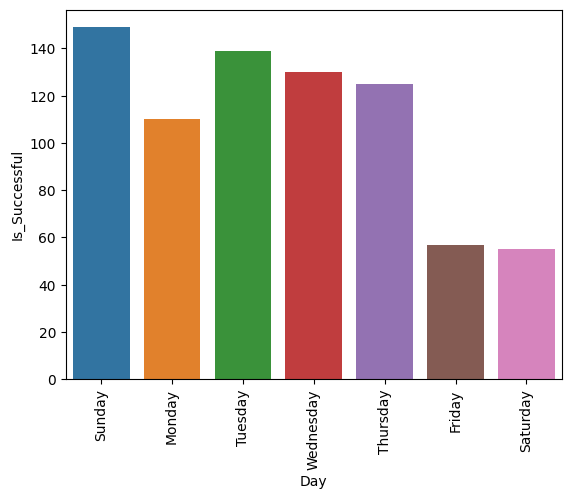

In [200]:
df1['Day'] = pd.Categorical(df1['Day'], categories=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)
grouped_df = pd.crosstab(df1['Day'],df1['Is_Successful'])
sns.barplot(data=grouped_df, x=grouped_df.index, y=grouped_df[1])
plt.xticks(rotation=90)
plt.ylabel("Is_Successful")
plt.show()

#### We can see that in Friday and Saturday there are significantly fewer successful articles 

<AxesSubplot: title={'center': 'Heatmap'}>

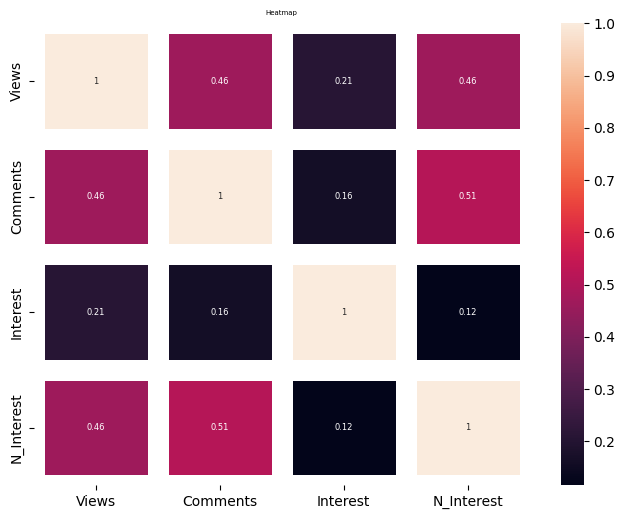

In [201]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Heatmap', fontsize=5)
ax.set_ylabel("Heatmap", fontsize=6)

ax.set_xlabel("Heatmap", fontsize=6)
sns.heatmap(df1.corr(), annot=True, linewidths=15, ax=ax,
            annot_kws={"fontsize": 6}) 


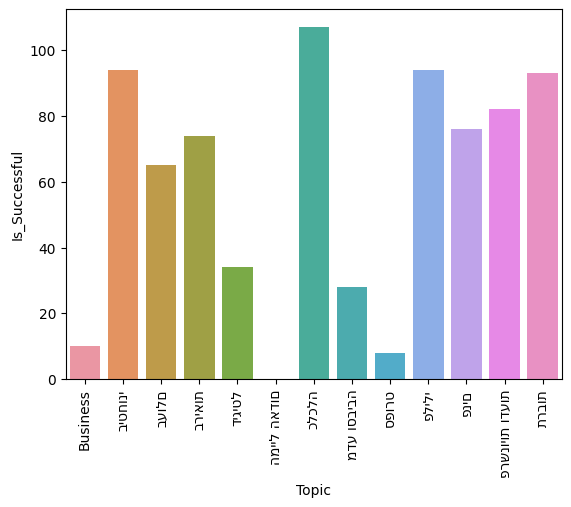

In [202]:
# Calculate the mean grade for each group

grouped_df = pd.crosstab(df1['Topic'],df1['Is_Successful'])
sns.barplot(data=grouped_df, x=grouped_df.index, y=grouped_df[1])
plt.xticks(rotation=90)
plt.ylabel("Is_Successful")
plt.show()

# Machine Learning

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


# classification

In [205]:
features = ['Author', 'Comments','Source','Hour','Day',
            'Interest', 'N_Interest', 'Video', 'Topic']
X = df1[features]
y = df1['Is_Successful']

print(X.head())
print(y.head())


                     Author  Comments  Source   Hour       Day  Interest  \
0             בן גולדפריינד         8     N12  16:42    Sunday       478   
1           אביבית מיסניקוב         3     N12  12:11    Sunday       217   
2  יוליה פריליק-ניב, LIVING        14  LIVING  07:00   Tuesday       209   
3                  יואב אבן        15     N12  17:43    Sunday       168   
4                ניצן שפירא        72     N12  10:24  Thursday       571   

   N_Interest Video    Topic  
0          40   1.0    ספורט  
1          11   0.0  ביטחוני  
2         128   0.0    כלכלה  
3          18   0.0   בריאות  
4         105   1.0    פלילי  
0    0
1    0
2    0
3    0
4    0
Name: Is_Successful, dtype: category
Categories (2, int64): [0, 1]


In [206]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("X_train:")
X_train.head()
print("y_train:")
y_train.head()

Initial amount of samples: #3729
Number of training samples: #2983
Number of test samples: #746
X_train:
y_train:


1832    0
3727    0
1940    0
209     0
3374    0
Name: Is_Successful, dtype: category
Categories (2, int64): [0, 1]

In [207]:
X_train_numeric = X_train._get_numeric_data().copy()
X_numeric_cols = X_train_numeric.columns
X_test_numeric = X_test[X_numeric_cols].copy()
X_numeric_cols

Index(['Comments', 'Interest', 'N_Interest'], dtype='object')

In [208]:
X_test_numeric

,Comments,Interest,N_Interest
2696,44,389,29
3470,6,118,16
2711,20,1833,26
368,2,1515,5
787,11,250,2
...,...,...,...
1334,26,1643,41
258,2,641,1
3603,173,891,14
1242,21,45,17


In [209]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(
    X_train_numeric), columns=X_numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.fit_transform(
    X_test_numeric), columns=X_numeric_cols, index=X_test.index)
X_train_scaled.head()

,Comments,Interest,N_Interest
1832,0.042553,0.009041,0.033175
3727,0.007092,0.003183,0.002844
1940,0.014184,0.070414,0.012322
209,0.014184,0.020628,0.012322
3374,0.089835,0.012479,0.109953


In [210]:
X_train_numeric.max().sort_values()

Comments        424
N_Interest     1055
Interest      15707
dtype: int32

In [211]:
X.select_dtypes('category')

,Author,Source,Day,Video,Topic
0,בן גולדפריינד,N12,Sunday,1.0,ספורט
1,אביבית מיסניקוב,N12,Sunday,0.0,ביטחוני
2,"יוליה פריליק-ניב, LIVING",LIVING,Tuesday,0.0,כלכלה
3,יואב אבן,N12,Sunday,0.0,בריאות
4,ניצן שפירא,N12,Thursday,1.0,פלילי
...,...,...,...,...,...
3724,איתמר מינמר,N12,Friday,0.0,כלכלה
3725,עמרי מניב,גלובס,Wednesday,1.0,פלילי
3726,ניר דבורי,N12,Wednesday,0.0,ביטחוני
3727,מערכת tvbee,היקס,Thursday,0.0,תרבות


In [212]:
X_discrete = X.select_dtypes('category').copy()
X_discrete_encoded = pd.get_dummies(X_discrete, prefix_sep="__")
X_train_discrete_encoded = X_discrete_encoded.loc[X_train.index, :]
X_test_discrete_encoded = X_discrete_encoded.loc[X_test.index, :]
X_train_discrete_encoded.head()

,Author__ שמעון איפרגן,Author__Business,Author__NEXT,Author__NEXTER,Author__duns 100,Author__hix,Author__mako,Author__mako כסף,Author__nexter,Author__none,...,Topic__בריאות,Topic__דיגיטל,Topic__המייל האדום,Topic__כלכלה,Topic__מדע וסביבה,Topic__ספורט,Topic__פלילי,Topic__פנים,Topic__פרשנויות ודעות,Topic__תרבות
1832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1940,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Concatting the Discrete coulmns with the numeric scaled coulmns

In [213]:
X_train_processed = pd.concat(
    (X_train_scaled, X_train_discrete_encoded), axis=1)
X_test_processed = pd.concat((X_test_scaled, X_test_discrete_encoded), axis=1)
X_train_processed.head()

,Comments,Interest,N_Interest,Author__ שמעון איפרגן,Author__Business,Author__NEXT,Author__NEXTER,Author__duns 100,Author__hix,Author__mako,...,Topic__בריאות,Topic__דיגיטל,Topic__המייל האדום,Topic__כלכלה,Topic__מדע וסביבה,Topic__ספורט,Topic__פלילי,Topic__פנים,Topic__פרשנויות ודעות,Topic__תרבות
1832,0.042553,0.009041,0.033175,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3727,0.007092,0.003183,0.002844,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1940,0.014184,0.070414,0.012322,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
209,0.014184,0.020628,0.012322,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3374,0.089835,0.012479,0.109953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [214]:
X_train_processed.columns

Index(['Comments', 'Interest', 'N_Interest', 'Author__ שמעון איפרגן',
       'Author__Business', 'Author__NEXT', 'Author__NEXTER',
       'Author__duns 100', 'Author__hix', 'Author__mako',
       ...
       'Topic__בריאות', 'Topic__דיגיטל', 'Topic__המייל האדום', 'Topic__כלכלה',
       'Topic__מדע וסביבה', 'Topic__ספורט', 'Topic__פלילי', 'Topic__פנים',
       'Topic__פרשנויות ודעות', 'Topic__תרבות'],
      dtype='object', length=495)

### Chi2 contingency

In [215]:
from scipy.stats import chi2_contingency
ct1 = pd.crosstab(df1["Author"], df1['Is_Successful'])
chi2_contingency(ct1)


(607.437572205517,
 1.3651304487969706e-09,
 413,
 array([[  0.79485117,   0.20514883],
        [ 12.71761866,   3.28238134],
        [  0.79485117,   0.20514883],
        [  0.79485117,   0.20514883],
        [  2.3845535 ,   0.6154465 ],
        [  0.79485117,   0.20514883],
        [  0.79485117,   0.20514883],
        [  0.79485117,   0.20514883],
        [  0.79485117,   0.20514883],
        [  1.58970233,   0.41029767],
        [  1.58970233,   0.41029767],
        [  0.79485117,   0.20514883],
        [  0.79485117,   0.20514883],
        [  6.35880933,   1.64119067],
        [  0.79485117,   0.20514883],
        [  6.35880933,   1.64119067],
        [  0.79485117,   0.20514883],
        [ 20.66613033,   5.33386967],
        [  0.79485117,   0.20514883],
        [  2.3845535 ,   0.6154465 ],
        [  0.79485117,   0.20514883],
        [  0.79485117,   0.20514883],
        [  1.58970233,   0.41029767],
        [ 11.12791633,   2.87208367],
        [  2.3845535 ,   0.6154465 ],


(26.998019235964733,
 2.0366405864893035e-07,
 1,
 array([[1813.05551086, 1150.94448914],
        [ 467.94448914,  297.05551086]]))

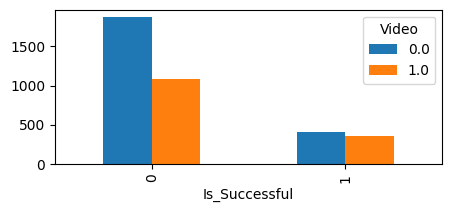

In [216]:
ct1 = pd.crosstab(df1["Is_Successful"], df1['Video'])
ct1.plot(kind='bar', figsize=(5, 2))
chi2_contingency(ct1)


#### We can see that articles with video are more successful

In [217]:
ct1 = pd.crosstab(df1["Is_Successful"], df1['Topic'])
chi2_contingency(ct1)


(56.40221993749895,
 1.0131288948336721e-07,
 12,
 array([[1.19227675e+02, 3.13966211e+02, 2.43224457e+02, 2.64685438e+02,
         2.28122285e+02, 7.94851167e-01, 4.43526951e+02, 1.52611424e+02,
         1.74867257e+01, 3.32247788e+02, 2.63890587e+02, 3.21119871e+02,
         2.63095736e+02],
        [3.07723250e+01, 8.10337892e+01, 6.27755430e+01, 6.83145615e+01,
         5.88777152e+01, 2.05148833e-01, 1.14473049e+02, 3.93885760e+01,
         4.51327434e+00, 8.57522124e+01, 6.81094127e+01, 8.28801287e+01,
         6.79042639e+01]]))

In [218]:
ct1 = pd.crosstab(df1["Is_Successful"], df1['Day'])
chi2_contingency(ct1)


(13.405648686062964,
 0.037027886124527225,
 6,
 array([[543.67819791, 490.42316975, 517.44810941, 479.29525342,
         514.26870475, 262.30088496, 156.58567981],
        [140.32180209, 126.57683025, 133.55189059, 123.70474658,
         132.73129525,  67.69911504,  40.41432019]]))

In [219]:
ct1 = pd.crosstab(df1["Is_Successful"], df1['Source'])
chi2_contingency(ct1)


(57.01369422726985,
 0.4000832263477002,
 55,
 array([[8.18696702e+01, 1.58970233e+00, 6.67674980e+01, 1.58970233e+00,
         1.50703781e+03, 7.94851167e-01, 1.46252615e+02, 1.58970233e+00,
         6.91520515e+01, 1.58970233e+00, 9.53821400e+00, 1.96328238e+02,
         7.94851167e-01, 7.94851167e+01, 7.94851167e-01, 1.90764280e+01,
         7.94851167e-01, 1.58970233e+00, 7.94851167e-01, 6.59726468e+01,
         2.46403862e+01, 1.58970233e+00, 7.94851167e-01, 2.86146420e+01,
         2.38455350e+00, 1.58970233e+00, 5.08704747e+01, 7.94851167e-01,
         4.92807723e+01, 3.49734513e+01, 1.51816573e+02, 1.58970233e+00,
         2.38455350e+00, 2.62300885e+01, 1.58970233e+00, 3.97425583e+00,
         1.51021722e+01, 7.94851167e-01, 4.76910700e+00, 7.94851167e-01,
         3.97425583e+00, 4.76910700e+00, 6.35880933e+00, 7.94851167e-01,
         7.94851167e-01, 3.97425583e+00, 7.94851167e-01, 2.25737731e+02,
         7.94851167e+00, 1.58970233e+00, 1.58970233e+00, 7.94851167e-01,
     

##### We see that there is a connection between the goal column and the columns: Author, Video and Day

### Outliers

,Article_Name,Author,Topic,Date,Hour,Views,Comments,Interest,N_Interest,Video,Source,Day,Is_Successful
10,"חברי כת ""לב טהור"" נעצרו במקסיקו, ישראל עמיר הצ...",גיא פלג,בעולם,2022-09-27,08:38,182420,184,8893,104,1.0,N12,Tuesday,1
18,תקלה קטלנית בחדר הניתוח: המנתח הפיל את המסור -...,יואב אבן,בריאות,2022-04-05,22:35,144478,41,4721,44,1.0,N12,Tuesday,1
31,לאחר שעות של חילופי אש בשכם: המחבל איבראהים א-...,ניר דבורי,ביטחוני,2022-08-09,07:17,85075,159,3452,31,1.0,N12,Tuesday,1
62,"תיעוד: נהגה בפראות, גררה רכב - ונמלטה מהמקום",אור רביד,פלילי,2022-10-16,21:29,45900,108,3001,27,1.0,mako,Sunday,1
218,"""כל אמא שילדה יודעת שקשה לתכנן היריון - במיוחד...",יפעת הללי אברהם,תרבות,2022-11-07,17:58,18124,1,2764,62,0.0,N12,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,"הדחת היועמ""שית - הליך צפוי מראש",אמנון אברמוביץ',פרשנויות ודעות,2022-07-04,11:22,85927,424,5179,850,0.0,N12,Monday,1
3469,"הרגע המכריע הגיע: הדרמה בצוות המו""מ עם אירן - ...",אהוד יערי,פרשנויות ודעות,2022-01-27,19:21,48387,28,2784,77,0.0,NEXTER,Thursday,1
3590,"דרמה בטיסה לדובאי: חיילת צה""ל נאלצה לנחות באיראן",ירון אברהם,ביטחוני,2022-11-02,16:36,193194,42,5674,80,1.0,N12,Wednesday,1
3591,"צפתה ב""אנטומיה של גריי"" ואבחנה מחלה נדירה בגופה",ענבר טויזר,בריאות,2022-05-17,13:04,127207,40,2765,43,1.0,mako,Tuesday,1


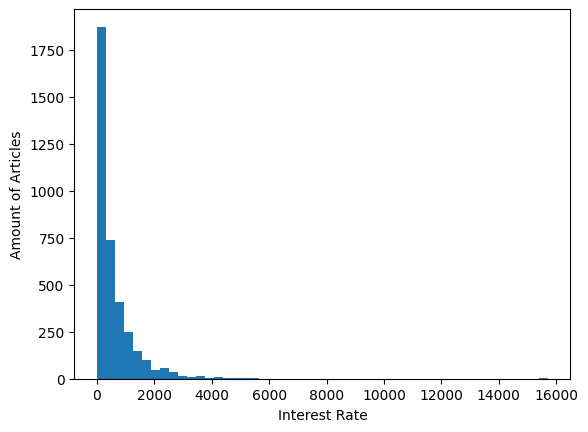

In [220]:

plt.hist(df1.Interest, bins=50)
plt.xlabel("Interest Rate")
plt.ylabel("Amount of Articles")
q25 = df1["Interest"].quantile(0.25)
q75 = df1["Interest"].quantile(0.75)

iqr = q75 - q25

outliers = df1[(df1["Interest"] < q25 - 3*iqr)
               | (df1["Interest"] > q75 + 3*iqr)]

outliers


In [221]:
bins = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850, 3000,4000]
labels = ['0-150', '150-300', '300-450', '450-600', '600-750', '750-900', '900-1050', '1050-1200', '1200-1350', '1350-1500', '1500-1650', 
          '1650-1800', '1800-1950', '1950-2100', '2100-2250', '2250-2400', '2400-2550', '2550-2700', '2700-2850', '2850-3000', '3000+']
df1['Interest_discrete'] = pd.cut(
    df1['Interest'], bins, labels=labels)


(190.15659677895346,
 9.855139082998943e-30,
 20,
 array([[9.74135658e+02, 2.48864342e+02],
        [4.61181150e+02, 1.17818850e+02],
        [3.32146009e+02, 8.48539907e+01],
        [2.48512122e+02, 6.34878780e+01],
        [1.76029420e+02, 4.49705802e+01],
        [1.54523563e+02, 3.94764369e+01],
        [1.21070008e+02, 3.09299918e+01],
        [8.20408608e+01, 2.09591392e+01],
        [8.04478344e+01, 2.05521656e+01],
        [4.85873059e+01, 1.24126941e+01],
        [4.77907927e+01, 1.22092073e+01],
        [3.34535549e+01, 8.54644511e+00],
        [2.62849360e+01, 6.71506402e+00],
        [1.75232907e+01, 4.47670934e+00],
        [2.30988831e+01, 5.90111686e+00],
        [1.91163171e+01, 4.88368292e+00],
        [2.07093435e+01, 5.29065650e+00],
        [1.43372378e+01, 3.66276219e+00],
        [1.19476982e+01, 3.05230183e+00],
        [1.59302642e+00, 4.06973577e-01],
        [2.94709888e+01, 7.52901117e+00]]))

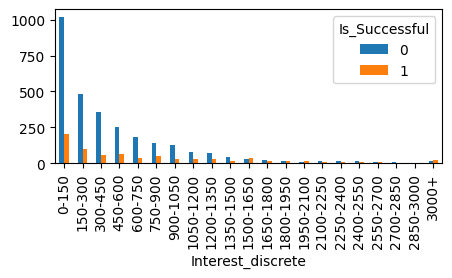

In [222]:
ct1 = pd.crosstab(df1["Interest_discrete"], df1['Is_Successful'])
ct1.plot(kind='bar', figsize=(5, 2))
chi2_contingency(ct1)


,Article_Name,Author,Topic,Date,Hour,Views,Comments,Interest,N_Interest,Video,Source,Day,Is_Successful,Interest_discrete
9,הוציאו כיסאות וזרקו זה על זה: קטטה המונית במסע...,ניצן שפירא,פנים,2022-08-14,20:24,40067,53,723,197,1.0,N12,Sunday,0,600-750
15,"זו לא ביקורת, זה רק עוד ניסיון לחסל את נתניהו ...",בועז ביסמוט,פרשנויות ודעות,2022-07-24,13:06,49993,186,1870,690,0.0,N12,Sunday,1,1800-1950
39,"הזמרים חוגגים, בציבור משלמים: לקראת חג הפורים ...",רומי הרוש,תרבות,2022-12-20,08:38,31704,34,704,176,0.0,N12,Tuesday,0,600-750
55,"שר בקשר זוגי עם גבר שצעיר ממנה ב-40 שנה: ""מבוג...",עמית אטיאס,תרבות,2022-12-04,10:39,20252,1,148,144,0.0,N12,Sunday,0,0-150
108,"סירב להשכיר דירה לעיתונאית: ""אין לך וי כחול בו...",נדב בורנשטיין,כלכלה,2022-08-29,01:01,60872,116,824,179,1.0,NEXTER,Monday,1,750-900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,"אם זה יתגלה, ההשפעה על משפט נתניהו עשויה להיות...",עמית סגל,פרשנויות ודעות,2022-02-06,09:43,83732,188,4782,531,0.0,N12,Sunday,1,NaN
3697,"""לא בא לי, מיציתי. עושה אך ורק מה שבא לי""",יפעת הללי אברהם,תרבות,2022-11-13,17:17,78536,7,97,825,1.0,חדשות סוף השבוע,Sunday,1,0-150
3698,מרצ - גלאון או גולן?,אמנון אברמוביץ',פרשנויות ודעות,2022-08-23,09:45,21047,48,997,228,0.0,N12,Tuesday,0,900-1050
3699,"מנדלבליט, מה עם האינטרס הציבורי?",גיא פלג,פרשנויות ודעות,2021-12-23,18:55,27033,103,1276,368,0.0,חדשות סוף השבוע,Thursday,0,1200-1350


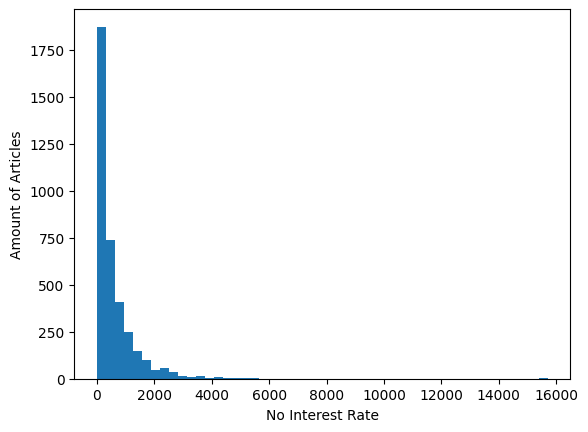

In [223]:

plt.hist(df1.Interest, bins=50)
plt.xlabel("No Interest Rate")
plt.ylabel("Amount of Articles")

q25 = df1["N_Interest"].quantile(0.25)
q75 = df1["N_Interest"].quantile(0.75)

iqr = q75 - q25

outliers = df1[(df1["N_Interest"] < q25 - 3*iqr)
               | (df1["N_Interest"] > q75 + 3*iqr)]

outliers


In [224]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '550-600', '600-650', '650-700', '700-750', '750-800', '800-850', '850-900', '900-950', '950-1000', '1000+']
df1['N_Interest_discrete'] = pd.cut(
    df1['N_Interest'], bins, labels=labels)


(635.350081221533,
 1.727692418772925e-122,
 19,
 array([[2.26204567e+03, 6.00954333e+02],
        [3.14458322e+02, 8.35416781e+01],
        [1.08243191e+02, 2.87568088e+01],
        [6.87383769e+01, 1.82616231e+01],
        [2.76533700e+01, 7.34662999e+00],
        [1.42217331e+01, 3.77826685e+00],
        [2.05425034e+01, 5.45749656e+00],
        [9.48115543e+00, 2.51884457e+00],
        [1.26415406e+01, 3.35845942e+00],
        [3.95048143e+00, 1.04951857e+00],
        [7.11086657e+00, 1.88913343e+00],
        [6.32077029e+00, 1.67922971e+00],
        [2.37028886e+00, 6.29711142e-01],
        [3.16038514e+00, 8.39614856e-01],
        [1.58019257e+00, 4.19807428e-01],
        [7.90096286e-01, 2.09903714e-01],
        [5.53067400e+00, 1.46932600e+00],
        [7.90096286e-01, 2.09903714e-01],
        [7.90096286e-01, 2.09903714e-01],
        [1.58019257e+00, 4.19807428e-01]]))

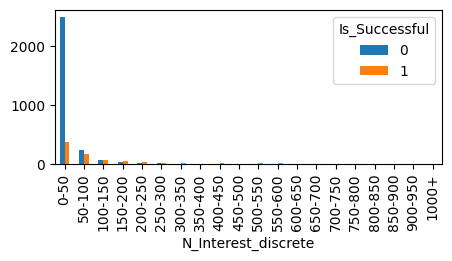

In [225]:
ct1 = pd.crosstab(df1["N_Interest_discrete"], df1['Is_Successful'])
ct1.plot(kind='bar', figsize=(5, 2))
chi2_contingency(ct1)


In [226]:
df1

,Article_Name,Author,Topic,Date,Hour,Views,Comments,Interest,N_Interest,Video,Source,Day,Is_Successful,Interest_discrete,N_Interest_discrete
0,הדרמה הגדולה בהיסטוריה: ליאו מסי ונבחרת ארגנטי...,בן גולדפריינד,ספורט,2022-12-18,16:42,40070,8,478,40,1.0,N12,Sunday,0,450-600,0-50
1,חייל הסיור הבדואי הוכר כסובל מפוסט-טראומה לצמי...,אביבית מיסניקוב,ביטחוני,2022-09-11,12:11,12804,3,217,11,0.0,N12,Sunday,0,150-300,0-50
2,לכבוד החגים: ניימאר רכש אחוזה נוספת בברזיל,"יוליה פריליק-ניב, LIVING",כלכלה,2021-12-28,07:00,29094,14,209,128,0.0,LIVING,Tuesday,0,150-300,100-150
3,פרסום ראשון | אחרי האירועים - מכתב התמיכה של ה...,יואב אבן,בריאות,2022-05-01,17:43,8579,15,168,18,0.0,N12,Sunday,0,150-300,0-50
4,"תושב ח'ורה שהותקף בבת ים ביום כיפור משחזר: ""צע...",ניצן שפירא,פלילי,2022-10-06,10:24,25942,72,571,105,1.0,N12,Thursday,0,450-600,100-150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,הערים שתוקעות פרויקטים של התחדשות עירונית,איתמר מינמר,כלכלה,2022-04-01,08:44,15499,30,466,21,0.0,N12,Friday,0,450-600,0-50
3725,חשד שלא דיווח על דירותיו כחוק: פרטים חדשים מחק...,עמרי מניב,פלילי,2022-11-23,07:07,24752,17,600,18,1.0,גלובס,Wednesday,0,450-600,0-50
3726,תקיפת הפעילים בחברון: לוחם גבעתי נשפט מחדש אצל...,ניר דבורי,ביטחוני,2022-11-30,07:23,23242,52,563,41,0.0,N12,Wednesday,0,450-600,0-50
3727,"עדות קשה במשפט האונס של כוכב ""מופע שנות ה-70"":...",מערכת tvbee,תרבות,2022-10-20,09:08,13506,4,50,3,0.0,היקס,Thursday,0,0-150,0-50


# Classification Models

### Logistic Regression Best f1 Score : 0.84

In [227]:
logistic_reg = LogisticRegression(class_weight='balanced')
logistic_reg.fit(X_train_processed, y_train)


LogisticRegression(class_weight='balanced')

In [228]:
def describe_output_for_model(model, X_test, y_test):

    print("Predicting...")
    print("\tdisplaying information re: the 'classification' model ...\n" )
    y_pred = model.predict(X_test)
    print("Model Accuracy: ", model.score(X_test, y_test))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(conf_mat)

    print("\nClassification Report: \n")
    print(classification_report(y_true=y_test, y_pred=y_pred))


describe_output_for_model(logistic_reg, X_test_processed, y_test)


Predicting...
	displaying information re: the 'classification' model ...

Model Accuracy:  0.7707774798927614
[[456 124]
 [ 47 119]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       580
           1       0.49      0.72      0.58       166

    accuracy                           0.77       746
   macro avg       0.70      0.75      0.71       746
weighted avg       0.81      0.77      0.78       746



## Neural NetWork Best f1 Score : 0.86

In [229]:
neural_network = MLPClassifier(random_state=1, max_iter=370, hidden_layer_sizes=400,
                    activation="relu").fit(X_train_processed, y_train)
describe_output_for_model(neural_network, X_test_processed, y_test)


Predicting...
	displaying information re: the 'classification' model ...

Model Accuracy:  0.7868632707774799
[[506  74]
 [ 85  81]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       580
           1       0.52      0.49      0.50       166

    accuracy                           0.79       746
   macro avg       0.69      0.68      0.68       746
weighted avg       0.78      0.79      0.78       746



## Decision Tree Best f1 Score : 0.89

In [230]:
des_tree = tree.DecisionTreeClassifier()
params = {"max_depth": [2, 3, 4, 5, 6, 7],
          "min_samples_split": [5, 10, 15, 20, 25, 30]}
clfCV = GridSearchCV(des_tree, params, cv=10)
clfCV.fit(X_train_processed, y_train)
print(f"best params are:{clfCV.best_params_}")
print(f"best score are:{clfCV.best_score_}")

#Over Fitting...

best params are:{'max_depth': 3, 'min_samples_split': 5}
best score are:0.8310352180646898


In [231]:
des_tree = tree.DecisionTreeClassifier(max_depth=7, min_samples_split=10)
des_tree.fit(X_train_processed, y_train)
describe_output_for_model(des_tree, X_test_processed, y_test)


Predicting...
	displaying information re: the 'classification' model ...

Model Accuracy:  0.8297587131367292
[[534  46]
 [ 81  85]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       580
           1       0.65      0.51      0.57       166

    accuracy                           0.83       746
   macro avg       0.76      0.72      0.73       746
weighted avg       0.82      0.83      0.82       746



## Random Foreset Best f1 Score : 0.88

In [232]:
rand_forest = RandomForestClassifier()
params = {"max_depth": [2, 3, 4, 5, 6, 7],
          "min_samples_split": [5, 10, 15, 20, 25, 30]}
clfCV = GridSearchCV(rand_forest, params, cv=10)
clfCV.fit(X_train_processed, y_train)
print(f"best params are:{clfCV.best_params_}")
print(f"best score are:{clfCV.best_score_}")


best params are:{'max_depth': 7, 'min_samples_split': 10}
best score are:0.8008720342977711


In [233]:
rand_forest = RandomForestClassifier(max_depth=7, min_samples_split=20)
rand_forest.fit(X_train_processed, y_train)
describe_output_for_model(rand_forest, X_test_processed, y_test)


Predicting...
	displaying information re: the 'classification' model ...

Model Accuracy:  0.7788203753351206
[[580   0]
 [165   1]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       580
           1       1.00      0.01      0.01       166

    accuracy                           0.78       746
   macro avg       0.89      0.50      0.44       746
weighted avg       0.83      0.78      0.68       746



## Knn Best f1 Score : 0.87

In [234]:
knn = KNeighborsClassifier()
params = {"n_neighbors": [3, 5, 7, 9, 11, 13,15,17,19,21]}
# Create a k-NN classifier with 3 neighbors
clfCV = GridSearchCV(knn, params, cv=10)
clfCV.fit(X_train_processed, y_train)
# Fit the classifier to the training data
print(f"best params are:{clfCV.best_params_}")
print(f"best score are:{clfCV.best_score_}")


C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

best params are:{'n_neighbors': 17}
best score are:0.8126046553388253


C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [235]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_processed, y_train)
describe_output_for_model(knn, X_test_processed, y_test)


Predicting...
	displaying information re: the 'classification' model ...



C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model Accuracy:  0.7828418230563002
[[548  32]
 [130  36]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       580
           1       0.53      0.22      0.31       166

    accuracy                           0.78       746
   macro avg       0.67      0.58      0.59       746
weighted avg       0.75      0.78      0.75       746



C:\Users\omerm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
